In [40]:
import pandas as pd
import numpy as np

In [41]:
dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv.zip')

In [42]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [43]:
dataset["gender"].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [44]:
dataset["hypertension"].value_counts()

,count
hypertension,
0,92515
1,7485


In [45]:
dataset = dataset.drop(["HbA1c_level"], axis=1)

In [46]:
dataset = dataset.drop(["bmi"], axis=1)

In [47]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,140,0
1,Female,54.0,0,0,No Info,80,0
2,Male,28.0,0,0,never,158,0
3,Female,36.0,0,0,current,155,0
4,Male,76.0,1,1,current,155,0
...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,90,0
99996,Female,2.0,0,0,No Info,100,0
99997,Male,66.0,0,0,former,155,0
99998,Female,24.0,0,0,never,100,0


In [48]:
dataset["smoking_history"].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
le.fit(dataset["gender"])
dataset["gender"] = le.transform(dataset["gender"])

le.fit(dataset["smoking_history"])
dataset["smoking_history"] = le.transform(dataset["smoking_history"])

In [51]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,blood_glucose_level,diabetes
0,0,80.0,0,1,4,140,0
1,0,54.0,0,0,0,80,0
2,1,28.0,0,0,4,158,0
3,0,36.0,0,0,1,155,0
4,1,76.0,1,1,1,155,0
...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,90,0
99996,0,2.0,0,0,0,100,0
99997,1,66.0,0,0,3,155,0
99998,0,24.0,0,0,4,100,0


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9372
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18292
           1       0.72      0.43      0.54      1708

    accuracy                           0.94     20000
   macro avg       0.83      0.71      0.75     20000
weighted avg       0.93      0.94      0.93     20000



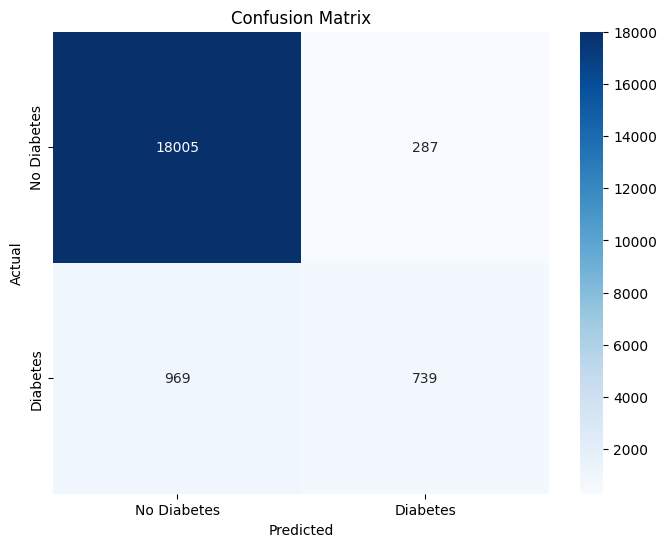

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 18005
False Positives (FP): 287
False Negatives (FN): 969
True Positives (TP): 739
